In [1]:
#Importamos las carpetas que vamos a utilizar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df0 = pd.read_csv('bahiakino.txt', sep='\s+')

In [3]:
#Conversion de Fecha en variable.
df0['FECHA'] = pd.to_datetime(df0.apply(lambda x: x['FECHA'],1), dayfirst=True)

In [4]:
#Conversion de las columnas "Precip", "Evap", "Tmax", "Tmin", en variables numerias.
columnas = ['PRECIP', 'EVAP', 'TMAX', 'TMIN']
df0[columnas] = df0[columnas].apply(pd.to_numeric, errors= 'coerce', axis=1)

In [5]:
#Tipos de variables.
df0.dtypes

FECHA     datetime64[ns]
PRECIP           float64
EVAP             float64
TMAX             float64
TMIN             float64
dtype: object

In [6]:
# Crear columnas con Año y Mes extraídos de la columna fecha. 
df0['Año'] = df0['FECHA'].dt.year
df0['Mes'] = df0['FECHA'].dt.month
df0['DIA'] = df0['FECHA'].dt.day
df0['TDIF'] = (df0['TMAX'] - df0['TMIN'])
df0['TPROM'] = (df0['TMAX'] + df0['TMIN'])/2

df0.head(), df0.tail()

(       FECHA  PRECIP  EVAP  TMAX  TMIN   Año  Mes  DIA  TDIF  TPROM
 0 1974-07-01     0.0   7.3  35.0  22.0  1974    7    1  13.0  28.50
 1 1974-07-02     0.0  10.5  34.0  22.5  1974    7    2  11.5  28.25
 2 1974-07-03     0.0  13.6  31.5  21.0  1974    7    3  10.5  26.25
 3 1974-07-04     0.0  10.7  41.0  28.0  1974    7    4  13.0  34.50
 4 1974-07-05     0.0  10.9  35.0  28.0  1974    7    5   7.0  31.50,
           FECHA  PRECIP  EVAP  TMAX  TMIN   Año  Mes  DIA  TDIF  TPROM
 6630 2011-07-27     0.0   9.4  34.0  24.0  2011    7   27  10.0  29.00
 6631 2011-07-28     0.0   7.0  33.5  24.5  2011    7   28   9.0  29.00
 6632 2011-07-29     0.0   7.6  33.0  25.5  2011    7   29   7.5  29.25
 6633 2011-07-30     0.0   8.1  36.0  25.5  2011    7   30  10.5  30.75
 6634 2011-07-31     0.0   NaN   NaN  27.5  2011    7   31   NaN    NaN)

In [7]:
# Número de años distintos
NumA = len(df0['Año'].unique())
print(NumA, "años de datos")

24 años de datos


In [8]:
s=df0['Año'][0]
r=df0['Año'][len(df0)-1]

In [9]:
#Número de días con heladas por año (FD: Tmin < 0ºC)
FD = []
años = []
numD = 0
for i in range(s,r+1):
    for j in range(0,len(df0)):
        if(df0["Año"][j] == i and df0["TMIN"][j] < 0):
            numD = numD+1
            
            #print("En",i,"hay",numD,"dias helados")
    FD.append(numD)
    años.append(i)
    if(numD>0):
        print("En",i,"tenemos",numD,"dias frios.")
    numD = 0

En 1975 tenemos 1 dias frios.
En 1976 tenemos 2 dias frios.
En 1985 tenemos 2 dias frios.
En 1990 tenemos 3 dias frios.
En 2011 tenemos 2 dias frios.


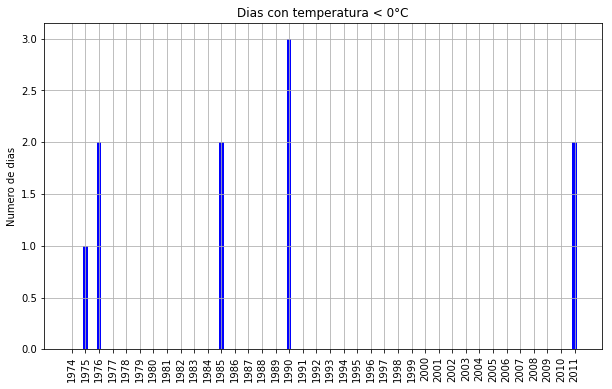

In [10]:
width = np.min(np.diff(años))/3
X=np.arange(len(años))
plt.figure(figsize = (10, 6))
plt.bar(X-width,FD,width,color='B')
plt.title("Dias con temperatura < 0°C")
plt.ylabel("Numero de dias")
plt.xticks(X-width, range(s,r+1), rotation = 90)
plt.grid()
plt.show()

In [11]:
#Número de días de verano por año (SU: Tmax > 25ºC).
DS = []
añoss = []
numD = 0
for i in range(s,r+1):
    for j in range(0,len(df0)):
        if(df0["Año"][j] == i and df0["TMAX"][j] > 25):
            numD = numD+1
    DS.append(numD)
    añoss.append(i)
    if(numD>0):
        print("En",i,"tenemos",numD,"dias de verano.")
    numD = 0

En 1974 tenemos 132 dias de verano.
En 1975 tenemos 228 dias de verano.
En 1976 tenemos 245 dias de verano.
En 1977 tenemos 227 dias de verano.
En 1978 tenemos 141 dias de verano.
En 1979 tenemos 58 dias de verano.
En 1980 tenemos 212 dias de verano.
En 1981 tenemos 212 dias de verano.
En 1982 tenemos 191 dias de verano.
En 1983 tenemos 178 dias de verano.
En 1984 tenemos 195 dias de verano.
En 1985 tenemos 194 dias de verano.
En 1986 tenemos 119 dias de verano.
En 1988 tenemos 153 dias de verano.
En 1989 tenemos 84 dias de verano.
En 1990 tenemos 164 dias de verano.
En 1991 tenemos 175 dias de verano.
En 1992 tenemos 203 dias de verano.
En 1993 tenemos 205 dias de verano.
En 2007 tenemos 185 dias de verano.
En 2008 tenemos 125 dias de verano.
En 2010 tenemos 49 dias de verano.
En 2011 tenemos 86 dias de verano.


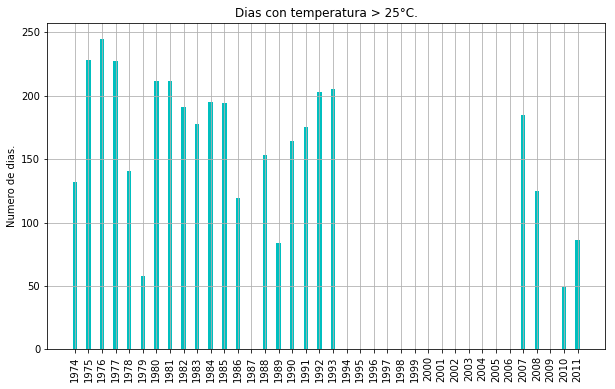

In [12]:
width = np.min(np.diff(años))/3
X=np.arange(len(añoss))
plt.figure(figsize = (10, 6))
plt.bar(X-width,DS,width,color='c')
plt.title("Dias con temperatura > 25°C.")
plt.ylabel("Numero de dias.")
plt.xticks(X-width, range(s,r+1), rotation = 90)
plt.grid()
plt.show()

In [13]:
#Número de noches tropicales por año (TR: Tmin > 20ºC)
TR = []
años3 = []
numD = 0
for i in range(s,r+1):
    for j in range(0,len(df0)):
        if(df0["Año"][j] == i and df0["TMIN"][j] > 20):
            numD = numD+1
    TR.append(numD)
    años3.append(i)
    if(numD>0):
        print("En",i,"tenemos",numD,"noches tropicales.")
    numD = 0

En 1974 tenemos 89 noches tropicales.
En 1975 tenemos 80 noches tropicales.
En 1976 tenemos 46 noches tropicales.
En 1977 tenemos 100 noches tropicales.
En 1978 tenemos 48 noches tropicales.
En 1979 tenemos 23 noches tropicales.
En 1980 tenemos 110 noches tropicales.
En 1981 tenemos 82 noches tropicales.
En 1982 tenemos 84 noches tropicales.
En 1983 tenemos 60 noches tropicales.
En 1984 tenemos 78 noches tropicales.
En 1985 tenemos 81 noches tropicales.
En 1986 tenemos 40 noches tropicales.
En 1988 tenemos 77 noches tropicales.
En 1989 tenemos 1 noches tropicales.
En 1990 tenemos 74 noches tropicales.
En 1991 tenemos 85 noches tropicales.
En 1992 tenemos 80 noches tropicales.
En 1993 tenemos 85 noches tropicales.
En 2007 tenemos 107 noches tropicales.
En 2008 tenemos 80 noches tropicales.
En 2010 tenemos 30 noches tropicales.
En 2011 tenemos 35 noches tropicales.


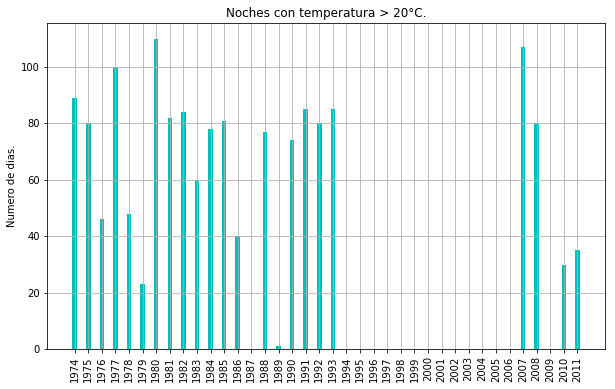

In [14]:
width = np.min(np.diff(años))/3
X=np.arange(len(años3))
plt.figure(figsize = (10, 6))
plt.bar(X-width,TR,width,color='c')
plt.title("Noches con temperatura > 20°C.")
plt.ylabel("Numero de dias.")
plt.xticks(X-width, range(s,r+1), rotation = 90)
plt.grid()
plt.show()

In [15]:
#Longitud de la estación de cultivo por año (GSL: Periodo entre los primeros 6 días seguidos del año  Tprom > 5ºC, y los últimos 6 días seguidos del año con Tprom < 5ºC)
ftday = []
numD = -1
for i in range(s,r+1):
    for j in range(5,len(df0)):
            if(df0["Año"][i-5] == j):
                if(df0["TPROM"][j-5] > 5 and df0["TPROM"][j-4] > 5 and df0["TPROM"][j-3] > 5 and
                   df0["TPROM"][j-2] > 5 and df0["TPROM"][j-1] > 5 and df0["TPROM"][j]   > 5):
                    numD = i
                    break
    if(numD != -1):
        ftday.append(numD)
        numD= -1
    else:
        ftday.append("NA")

In [16]:
ltday = []
numD2 = -1
for i in range(r,s-1,-1):
    for j in range(len(df0),5,-1):
            if(df0["Año"][i-5] == j):
                if(df0["TPROM"][j-5] > 5 and df0["TPROM"][j-4] > 5 and df0["TPROM"][j-3] > 5 and
                   df0["TPROM"][j-2] > 5 and df0["TPROM"][j-1] > 5 and df0["TPROM"][j]   > 5):
                    numD2 = i
                    break
    if(numD != -1):
        ltday.append(numD2)
        numD2= -1
    else:
        ltday.append("NA")

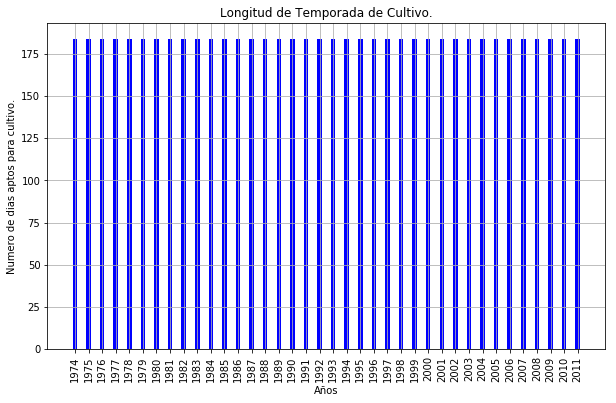

In [18]:
Ltc = []
for i in range(0,len(ltday)):
    if(ltday[i]!="NA" and ftday[i]!="NA"):
        Ltc.append(ltday[i]-ftday[i])
    if(ltday[i]=='NA'):
            Ltc.append( len(df0[df0['Año'] == s].index) )
    else:
        if(ftday[i]=='NA'):
            Ltc.append(0)
Ltc
width = np.min(np.diff(años))/3
X=np.arange(len(Ltc))
plt.figure(figsize = (10, 6))
plt.bar(X-width,Ltc,width,color='B')
plt.title("Longitud de Temporada de Cultivo.")
plt.ylabel("Numero de dias aptos para cultivo.")
plt.xlabel("Años")
plt.xticks(X-width, range(s,r+1), rotation = 90)
plt.grid()
plt.show()

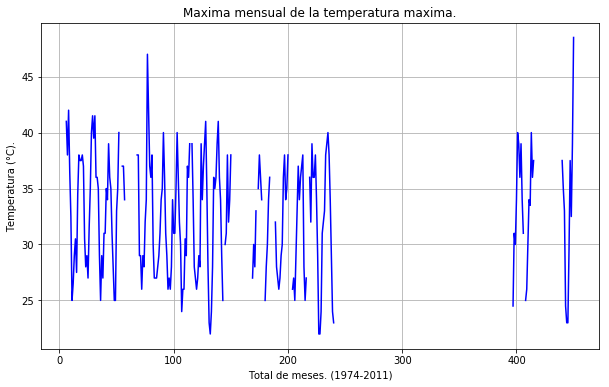

In [19]:
#TXx: La máxima mensual de la temperatura máxima, max(Tmax).
TXx = []
for k in range(s,r+1):
    df0_Año = df0[df0["Año"]==k]
    for i in range(1,13):
        df0_Mes = df0_Año[df0_Año["Mes"]==i]
        maxmens = df0_Mes.TMAX.max()
        TXx.append(maxmens)

plt.figure(figsize = (10, 6))
plt.plot(range(0,len(TXx)),TXx,color='B')
plt.title("Maxima mensual de la temperatura maxima.")
plt.ylabel("Temperatura (°C).")
plt.xlabel("Total de meses. (1974-2011)")
plt.grid()
plt.show()

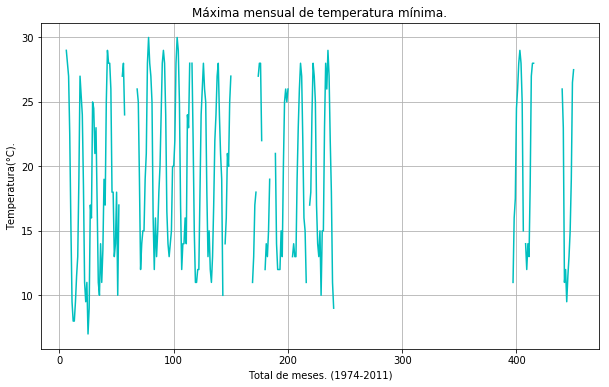

In [20]:
#TNx. La máxima mensual de la temperatura mínima, max(Tmin).
TNx = []
minmens=0
for k in range(s,r+1):
    df0_Año = df0[df0["Año"]==k]
    for i in range(1,13):
        df0_Mes = df0_Año[df0_Año["Mes"]==i]
        minmens = df0_Mes.TMIN.max()
        TNx.append(minmens)

plt.figure(figsize = (10, 6))
plt.plot(range(0,len(TNx)),TNx,color='c')
plt.title("Máxima mensual de temperatura mínima.")
plt.ylabel("Temperatura(°C).")
plt.xlabel("Total de meses. (1974-2011)")
plt.grid()
plt.show()

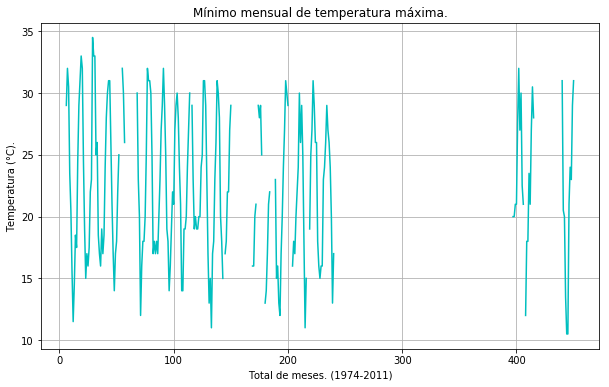

In [21]:
#TXn: El mínimo mensual de la temperatura máxima, min(Tmax). 
TXn = []
for k in range(s,r+1):
    df0_Año = df0[df0["Año"]==k]
    for i in range(1,13):
        df0_Mes = df0_Año[df0_Año["Mes"]==i]
        minmaxmens = df0_Mes.TMAX.min()
        TXn.append(minmaxmens)


plt.figure(figsize = (10, 6))
plt.plot(range(0,len(TXn)),TXn,color='c')
plt.title("Mínimo mensual de temperatura máxima.")
plt.ylabel("Temperatura (°C).")
plt.xlabel("Total de meses. (1974-2011)")
plt.grid()
plt.show()

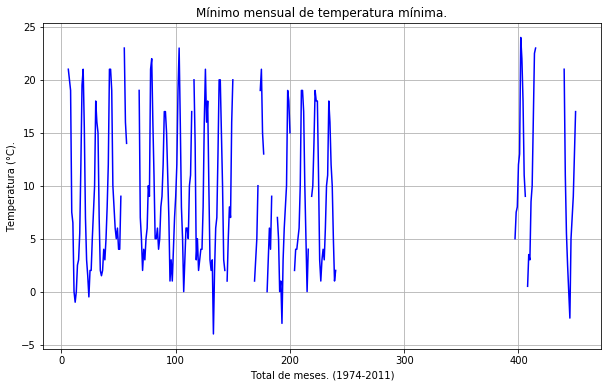

In [22]:
#TNn: El mínimo mensual de la temperatura mínima, min(Tmin).
TNn = []
for k in range(s,r+1):
    df0_Año = df0[df0["Año"]==k]
    for i in range(1,13):
        df0_Mes = df0_Año[df0_Año["Mes"]==i]
        minminmens = df0_Mes.TMIN.min()
        TNn.append(minminmens)


plt.figure(figsize = (10, 6))
plt.plot(range(0,len(TNn)),TNn,color='B')
plt.title("Mínimo mensual de temperatura mínima.")
plt.ylabel("Temperatura (°C).")
plt.xlabel("Total de meses. (1974-2011)")
plt.grid()
plt.show()

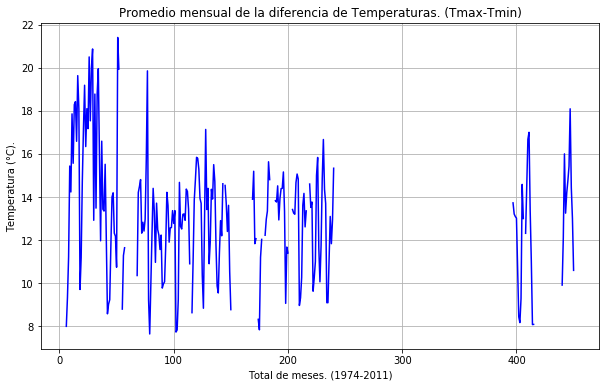

In [23]:
#DTR: El promedio mensual de la diferencia de temperaturas (Tmax-Tmin). 
DTR = []
for k in range(s,r+1):
    df0_Año = df0[df0["Año"]==k]
    for i in range(1,13):
        df0_Mes = df0_Año[df0_Año["Mes"]==i]
        prom = df0_Mes.TDIF.mean()
        DTR.append(prom)
        
plt.figure(figsize = (10, 6))
plt.plot(range(0,len(DTR)),DTR,color='B')
plt.title("Promedio mensual de la diferencia de Temperaturas. (Tmax-Tmin)")
plt.ylabel("Temperatura (°C).")
plt.xlabel("Total de meses. (1974-2011)")
plt.grid()
plt.show()

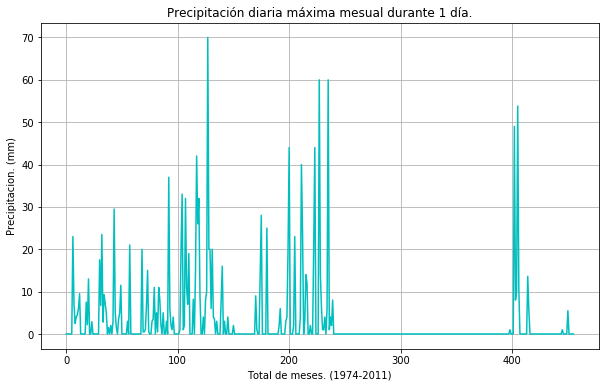

In [24]:
#Rx1day: Precipitación diaria máxima mensual en 1 día.  
Rx1day=[]
for k in range(s,r+1):
    df0_Año = df0[df0["Año"]==k]
    for i in range(1,13):
        df0_Mes = df0_Año[df0_Año["Mes"]==i]
        if(df0_Mes['PRECIP'].mean()!=0 and df0_Mes['PRECIP'].count()!=0):
            Rmaxid = df0_Mes['PRECIP'].idxmax()
            Rmax = df0_Mes['PRECIP'][Rmaxid]
            Rx1day.append(Rmax)
        else:  
            Rx1day.append(0.0)
            
plt.figure(figsize = (10, 6))
plt.plot(range(0,len(Rx1day)),Rx1day,color='c')
plt.title("Precipitación diaria máxima mesual durante 1 día.")
plt.ylabel("Precipitacion. (mm)")
plt.xlabel("Total de meses. (1974-2011)")
plt.grid()
plt.show()

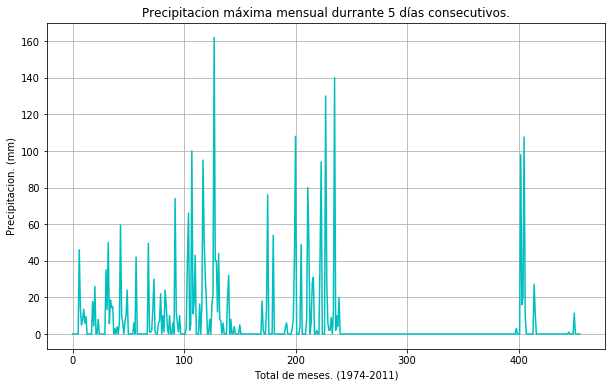

In [25]:
#Rx5 day: Precipitación diaria máxima mensual en 5 días consecutivos.
Rx5day=[]
safo=-1000
for k in range(s,r+1):
    df0_Año = df0[df0["Año"]==k]
    for i in range(1,13):
        df0_Mes = df0_Año[df0_Año["Mes"]==i]
        df0_Mes = df0_Mes.reset_index()
        if(df0_Mes['PRECIP'].mean()!=0 and df0_Mes['PRECIP'].count()!=0):
            for j in range (4,len(df0_Mes)):
                lluvia =(df0_Mes['PRECIP'][j-4]+df0_Mes['PRECIP'][j-3]+
                         df0_Mes['PRECIP'][j-3]+df0_Mes['PRECIP'][j-2]+
                         df0_Mes['PRECIP'][j])
                if (lluvia>safo):
                         safo=lluvia
            Rx5day.append(safo)
            safo=-1000
            #print(Rx5day)
        else:  
            Rx5day.append(0.0)
            
plt.figure(figsize = (10, 6))
plt.plot(range(0,len(Rx5day)),Rx5day,color='c')
plt.title("Precipitacion máxima mensual durrante 5 días consecutivos.")
plt.ylabel("Precipitacion. (mm)")
plt.xlabel("Total de meses. (1974-2011)")
plt.grid()
plt.show()

In [26]:
#SDII: Número de días en un año con precipitación mayor igual a 1mm.
MMMM = []
años12 = []
numD = 0
for i in range(s,r+1):
    for j in range(0,len(df0)):
        if(df0["Año"][j] == i and df0["PRECIP"][j] == 1 ):
            numD = numD+1
    MMMM.append(numD)
    años12.append(i)
    if(numD>0):
        print("En",i,"tenemos",numD,"dias con precipitaciones de 1 mm.")
    numD = 0

En 1974 tenemos 1 dias con precipitaciones de 1 mm.
En 1975 tenemos 2 dias con precipitaciones de 1 mm.
En 1976 tenemos 1 dias con precipitaciones de 1 mm.
En 1977 tenemos 2 dias con precipitaciones de 1 mm.
En 1978 tenemos 2 dias con precipitaciones de 1 mm.
En 1979 tenemos 3 dias con precipitaciones de 1 mm.
En 1980 tenemos 2 dias con precipitaciones de 1 mm.
En 1981 tenemos 4 dias con precipitaciones de 1 mm.
En 1982 tenemos 5 dias con precipitaciones de 1 mm.
En 1983 tenemos 1 dias con precipitaciones de 1 mm.
En 1984 tenemos 5 dias con precipitaciones de 1 mm.
En 1986 tenemos 3 dias con precipitaciones de 1 mm.
En 1988 tenemos 1 dias con precipitaciones de 1 mm.
En 1990 tenemos 2 dias con precipitaciones de 1 mm.
En 1991 tenemos 3 dias con precipitaciones de 1 mm.
En 1992 tenemos 3 dias con precipitaciones de 1 mm.
En 1993 tenemos 5 dias con precipitaciones de 1 mm.
En 2007 tenemos 2 dias con precipitaciones de 1 mm.
En 2011 tenemos 2 dias con precipitaciones de 1 mm.


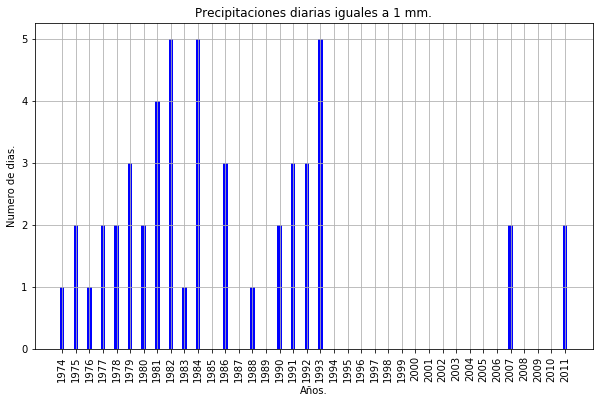

In [27]:
width = np.min(np.diff(años12))/3
X=np.arange(len(años12))
plt.figure(figsize = (10, 6))
plt.bar(X-width,MMMM,width,color='B')
plt.title("Precipitaciones diarias iguales a 1 mm.")
plt.ylabel("Numero de dias.")
plt.xlabel("Años.")
plt.xticks(X-width, range(s,r+1), rotation = 90)
plt.grid()
plt.show()

In [28]:
#R10mm: Número de días en el año con precipitación diaria mayor igual a 10 mm. 
R10mm = []
años13 = []
numD = 0
for i in range(s,r+1):
    for j in range(0,len(df0)):
        if(df0["Año"][j] == i and df0["PRECIP"][j] > 10 ):
            numD = numD+1
    R10mm.append(numD)
    años13.append(i)
    if(numD>0):
        print("En",i,"tenemos",numD,"dias con precipitaciones mayores a 10 mm.")
    numD = 0

En 1974 tenemos 2 dias con precipitaciones mayores a 10 mm.
En 1975 tenemos 1 dias con precipitaciones mayores a 10 mm.
En 1976 tenemos 3 dias con precipitaciones mayores a 10 mm.
En 1977 tenemos 2 dias con precipitaciones mayores a 10 mm.
En 1978 tenemos 2 dias con precipitaciones mayores a 10 mm.
En 1979 tenemos 1 dias con precipitaciones mayores a 10 mm.
En 1980 tenemos 3 dias con precipitaciones mayores a 10 mm.
En 1981 tenemos 2 dias con precipitaciones mayores a 10 mm.
En 1982 tenemos 4 dias con precipitaciones mayores a 10 mm.
En 1983 tenemos 6 dias con precipitaciones mayores a 10 mm.
En 1984 tenemos 6 dias con precipitaciones mayores a 10 mm.
En 1985 tenemos 1 dias con precipitaciones mayores a 10 mm.
En 1988 tenemos 3 dias con precipitaciones mayores a 10 mm.
En 1989 tenemos 1 dias con precipitaciones mayores a 10 mm.
En 1990 tenemos 5 dias con precipitaciones mayores a 10 mm.
En 1991 tenemos 5 dias con precipitaciones mayores a 10 mm.
En 1992 tenemos 9 dias con precipitacion

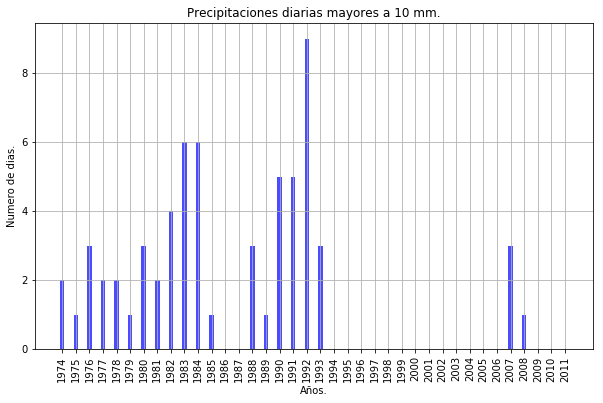

In [29]:
width = np.min(np.diff(años13))/3
X=np.arange(len(años13))
plt.figure(figsize = (10, 6))
plt.bar(X-width,R10mm,width,alpha=0.7,color="B")
plt.title("Precipitaciones diarias mayores a 10 mm.")
plt.ylabel("Numero de dias.")
plt.xlabel("Años.")
plt.xticks(X-width, range(s,r+1), rotation = 90)
plt.grid()
plt.show()

In [30]:
#R20mm: Número de días en el año con precipitación diaria mayor igual a 20mm.
R20mm = []
años14 = []
numD = 0
for i in range(s,r+1):
    for j in range(0,len(df0)):
        if(df0["Año"][j] == i and df0["PRECIP"][j] > 20 ):
            numD = numD+1
    R20mm.append(numD)
    años14.append(i)
    if(numD>0):
        print("En",i,"tenemos",numD,"dias con precipitaciones mayores a 20 mm.")
    numD = 0

En 1974 tenemos 1 dias con precipitaciones mayores a 20 mm.
En 1976 tenemos 1 dias con precipitaciones mayores a 20 mm.
En 1977 tenemos 2 dias con precipitaciones mayores a 20 mm.
En 1978 tenemos 1 dias con precipitaciones mayores a 20 mm.
En 1981 tenemos 1 dias con precipitaciones mayores a 20 mm.
En 1982 tenemos 3 dias con precipitaciones mayores a 20 mm.
En 1983 tenemos 3 dias con precipitaciones mayores a 20 mm.
En 1984 tenemos 2 dias con precipitaciones mayores a 20 mm.
En 1988 tenemos 1 dias con precipitaciones mayores a 20 mm.
En 1989 tenemos 1 dias con precipitaciones mayores a 20 mm.
En 1990 tenemos 1 dias con precipitaciones mayores a 20 mm.
En 1991 tenemos 3 dias con precipitaciones mayores a 20 mm.
En 1992 tenemos 4 dias con precipitaciones mayores a 20 mm.
En 1993 tenemos 1 dias con precipitaciones mayores a 20 mm.
En 2007 tenemos 2 dias con precipitaciones mayores a 20 mm.


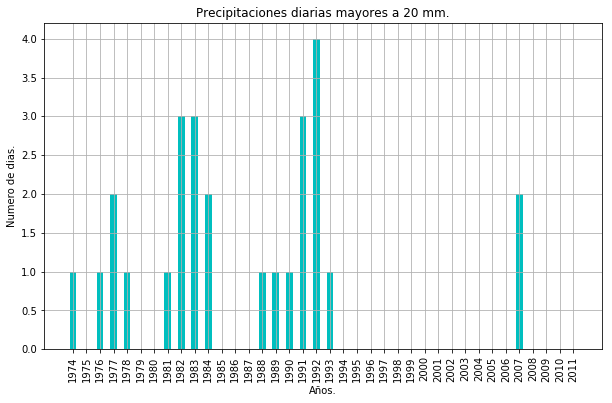

In [31]:
width = np.min(np.diff(años14))/2
X=np.arange(len(años14))
plt.figure(figsize = (10, 6))
plt.bar(X-width,R20mm,width,color='c')
plt.title("Precipitaciones diarias mayores a 20 mm.")
plt.ylabel("Numero de dias.")
plt.xlabel("Años.")
plt.xticks(X-width, range(s,r+1), rotation = 90)
plt.grid()
plt.show()

In [32]:
#CDD: Número de días consecutivos secos, sin precipitación o precipitación < 1mm.
CDD = []
años15 = []
numD = 0
safe = 0
for i in range(s,r+1):
    for j in range(0,len(df0)):
        if(df0["Año"][j] == i):
            if (df0["PRECIP"][j] < 1):
                safe = safe+1
            elif (df0['PRECIP'][j] >= 1):
                if(safe>numD):
                    numD=safe
                    safe=0
                else:
                    safe=0          
    CDD.append(numD)
    años15.append(i)
    if(numD>0):
        print("En",i,"tenemos un máximo de",numD,"dias secos consecutivos.")
    numD = 0
    safe=0

En 1974 tenemos un máximo de 38 dias secos consecutivos.
En 1975 tenemos un máximo de 157 dias secos consecutivos.
En 1976 tenemos un máximo de 190 dias secos consecutivos.
En 1977 tenemos un máximo de 81 dias secos consecutivos.
En 1978 tenemos un máximo de 114 dias secos consecutivos.
En 1979 tenemos un máximo de 81 dias secos consecutivos.
En 1980 tenemos un máximo de 132 dias secos consecutivos.
En 1981 tenemos un máximo de 74 dias secos consecutivos.
En 1982 tenemos un máximo de 174 dias secos consecutivos.
En 1983 tenemos un máximo de 124 dias secos consecutivos.
En 1984 tenemos un máximo de 74 dias secos consecutivos.
En 1985 tenemos un máximo de 113 dias secos consecutivos.
En 1986 tenemos un máximo de 148 dias secos consecutivos.
En 1988 tenemos un máximo de 64 dias secos consecutivos.
En 1989 tenemos un máximo de 192 dias secos consecutivos.
En 1990 tenemos un máximo de 147 dias secos consecutivos.
En 1991 tenemos un máximo de 125 dias secos consecutivos.
En 1992 tenemos un m

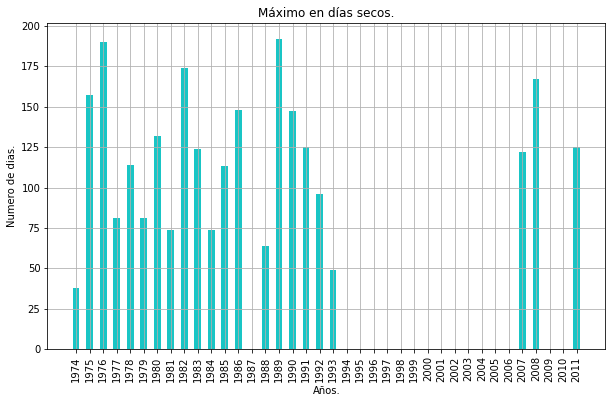

In [33]:
width = np.min(np.diff(años15))/2
X=np.arange(len(años15))
plt.figure(figsize = (10, 6))
plt.bar(X-width,CDD,width,alpha=0.9,color='c')
plt.title("Máximo en días secos.")
plt.ylabel("Numero de dias.")
plt.xlabel("Años.")
plt.xticks(X-width, range(s,r+1), rotation = 90)
plt.grid()
plt.show()

In [34]:
#CWD: Número de días consecutivos húmedos, con precipitación igual o mayor a 1mm. 
CWD = []
años16 = []
numD = 0
safe = 0
for i in range(s,r+1):
    for j in range(0,len(df0)):
        if(df0["Año"][j] == i):
            if (df0["PRECIP"][j] >= 1):
                safe = safe+1
            elif (df0['PRECIP'][j] < 1):
                if(safe>numD):
                    numD=safe
                    safe=0
                else:
                    safe=0
                    
    CWD.append(numD)
    años16.append(i)
    if(numD>0):
        print("En",i,"tenemos un máximo de",numD,"dias lluviosos consecutivos.")
    numD = 0
    safe=0

En 1974 tenemos un máximo de 2 dias lluviosos consecutivos.
En 1975 tenemos un máximo de 4 dias lluviosos consecutivos.
En 1976 tenemos un máximo de 3 dias lluviosos consecutivos.
En 1977 tenemos un máximo de 3 dias lluviosos consecutivos.
En 1978 tenemos un máximo de 2 dias lluviosos consecutivos.
En 1979 tenemos un máximo de 3 dias lluviosos consecutivos.
En 1980 tenemos un máximo de 2 dias lluviosos consecutivos.
En 1981 tenemos un máximo de 3 dias lluviosos consecutivos.
En 1982 tenemos un máximo de 3 dias lluviosos consecutivos.
En 1983 tenemos un máximo de 6 dias lluviosos consecutivos.
En 1984 tenemos un máximo de 2 dias lluviosos consecutivos.
En 1985 tenemos un máximo de 2 dias lluviosos consecutivos.
En 1986 tenemos un máximo de 2 dias lluviosos consecutivos.
En 1988 tenemos un máximo de 2 dias lluviosos consecutivos.
En 1989 tenemos un máximo de 2 dias lluviosos consecutivos.
En 1990 tenemos un máximo de 4 dias lluviosos consecutivos.
En 1991 tenemos un máximo de 3 dias lluv

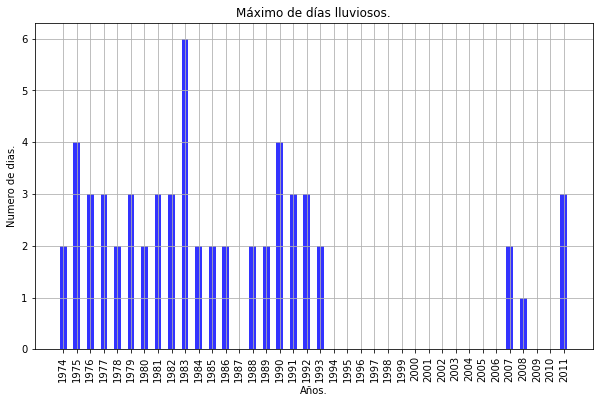

In [35]:
width = np.min(np.diff(años16))/2
X=np.arange(len(años16))
plt.figure(figsize = (10, 6))
plt.bar(X-width,CWD,width,alpha=0.8,color='B')
plt.title("Máximo de días lluviosos.")
plt.ylabel("Numero de dias.")
plt.xlabel("Años.")
plt.xticks(X-width, range(s,r+1), rotation = 90)
plt.grid()
plt.show()